## Observations and Insights 

In [133]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data_full = pd.merge(study_results,mouse_metadata, on='Mouse ID')

# Display the data table for preview

data_full.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [134]:
# Check the number of mice.
rows = data_full['Mouse ID'].count()
print(f"There are {rows} rows")
print(f"There are {data_full['Mouse ID'].nunique()} unique mice")

There are 1893 rows
There are 249 unique mice


In [135]:
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_id = data_full[data_full.duplicated(subset=None, keep='first')]
duplicate_id

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.0,0,Propriva,Female,21,26


In [136]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_df = data_full[data_full.duplicated(subset=['Mouse ID', 'Timepoint'], keep='first')]
duplicate_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [137]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = data_full.loc[data_full['Mouse ID'] != 'g989']

In [138]:
# Check the number of mice in the clean DataFrame.
clean_data['Mouse ID'].nunique()

248

## Summary Statistics

In [139]:
# Method 2(optional): Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
sum_stats = clean_data.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)' : ['mean', 'max','median','std','sem']})
sum_stats

Tumor Volume (mm3)                                          
                           mean        max     median       std       sem
Drug Regimen                                                             
Capomulin             40.675741  48.158209  41.557809  4.994774  0.329346
Ceftamin              52.591172  68.923185  51.776157  6.268188  0.469821
Infubinol             52.884795  72.226731  51.820584  6.567243  0.492236
Ketapril              55.235638  78.567014  53.698743  8.279709  0.603860
Naftisol              54.331565  76.668817  52.509285  8.134708  0.596466
Placebo               54.033581  73.212939  52.288934  7.821003  0.581331
Propriva              52.320930  72.455421  50.446266  6.622085  0.544332
Ramicane              40.216745  47.622816  40.673236  4.846308  0.320955
Stelasyn              54.233149  75.123690  52.431737  7.710419  0.573111
Zoniferol             53.236507  73.324432  51.818479  6.966589  0.516398

## Bar and Pie Charts

[]

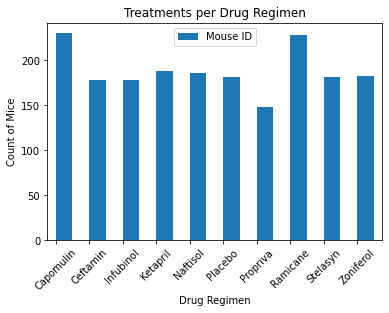

In [140]:
# Use Pandas to generate a bar plot showing the total number of mice in each treatment regimen throughout the course of the study. 
regimen_count = clean_data.groupby(['Drug Regimen'],as_index=False).agg({"Mouse ID": "count"})

regimen_chartpd = regimen_count.plot(x="Drug Regimen", kind='bar', title="Treatments per Drug Regimen", rot=45, align="edge")
regimen_chartpd.set_xlabel("Drug Regimen")
regimen_chartpd.set_ylabel("Count of Mice")
regimen_chartpd.plot()
## Note: this plot will be identical to the one that uses Pyplot

Text(0, 0.5, 'Count of Mice')

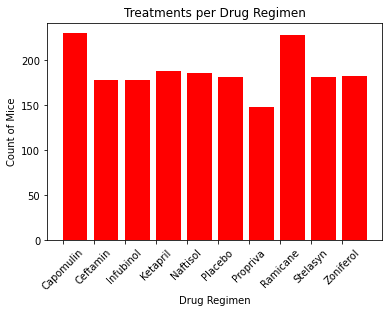

In [141]:
# Use Pyplot to generate a bar plot showing the total number of mice treatment in each treatment regimen throughout the course of the study.
x_axis = regimen_count["Drug Regimen"]
count_mice = regimen_count["Mouse ID"]
regimen_chartpy = plt.bar(x_axis, count_mice, color='r', align="edge")
plt.title("Treatments per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=45)
plt.ylabel("Count of Mice")
##  Note: this plot will be identical to the one that uses Pandas

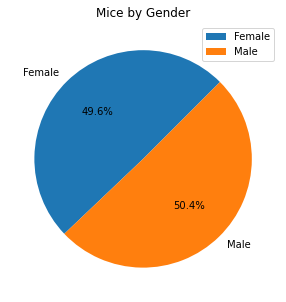

In [142]:
# Use Pandas to generate a pie plot showing the distribution of female versus male mice
gender_df = clean_data.groupby('Sex',as_index=False).agg({'Mouse ID':"nunique"})
gender_chartpd = gender_df.plot.pie(y='Mouse ID', labels=gender_df['Sex'],label='',title='Mice by Gender', figsize=(10,5), startangle=45, autopct="%1.1f%%")
plt.show()

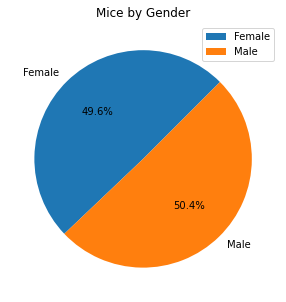

In [143]:
# Use Pyplot to generate a pie plot showing the distribution of female versus male mice
sex = gender_df["Sex"]
count  = gender_df["Mouse ID"]
plt.figure(figsize=(10,5))
plt.pie(count,labels=sex,startangle=45,autopct="%1.1f%%")
plt.title('Mice by Gender')
plt.legend(sex,loc="upper right")
plt.show()

## Quartiles, Outliers and Boxplots

In [145]:
# Calculate the final tumor volume of each mouse across four of the drug regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (latest) timepoint for each mouse
clean_data = clean_data.sort_values(by=['Mouse ID', "Timepoint"])
final_df = clean_data.groupby('Mouse ID',as_index=False).last()
final_df = final_df[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)']]

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
results_df = pd.merge(mouse_metadata, final_df,on='Mouse ID')
results_df = results_df.sort_values(by=['Drug Regimen'])

In [146]:
# Put the four drug regimens into a list that can be iterated over in a for-loop 
# (and later used for plot labels)
regimen = ['Capomulin','Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
capomulin_volume = []
ramicane_volume = []
infubinol_volume = []
ceftamin_volume = []

for x, y in results_df.iterrows():
    if results_df.iloc[x,1] == regimen[0]:
        capomulin_volume.append(results_df.iloc[x, 6])
    elif results_df.iloc[x,1] == regimen[1]:
        ramicane_volume.append(results_df.iloc[x, 6])
    elif results_df.iloc[x,1] == regimen[2]:
        infubinol_volume.append(results_df.iloc[x, 6])
    elif results_df.iloc[x,1] == regimen[3]:
        ceftamin_volume.append(results_df.iloc[x, 6])

regimen_df = pd.DataFrame({'Capomulin' : capomulin_volume,'Ramicane' : ramicane_volume, 'Infubinol': infubinol_volume, 'Ceftamin': ceftamin_volume})

In [147]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Capomulin
capomulin_quartiles = regimen_df['Capomulin'].quantile([.25, .5, .75])
capomulin_lowerq = capomulin_quartiles[.25]
capomulin_uperq = capomulin_quartiles[.75]
capomulin_iqr = capomulin_uperq - capomulin_lowerq

# Ramicane
ramicane_quartiles = regimen_df['Ramicane'].quantile([.25, .5, .75])
ramicane_lowerq = ramicane_quartiles[.25]
ramicane_uperq = ramicane_quartiles[.75]
ramicane_iqr = ramicane_uperq - ramicane_lowerq

# Infubinol
infubinol_quartiles = regimen_df['Infubinol'].quantile([.25, .5, .75])
infubinol_lowerq = infubinol_quartiles[.25]
infubinol_uperq = infubinol_quartiles[.75]
infubinol_iqr = infubinol_uperq - ramicane_lowerq

#Ceftamin
ceftamin_quartiles = regimen_df['Ceftamin'].quantile([.25, .5, .75])
ceftamin_lowerq = ceftamin_quartiles[.25]
ceftamin_uperq = ceftamin_quartiles[.75]
ceftamin_iqr = ceftamin_uperq - ceftamin_lowerq

# Determine outliers using upper and lower bounds
# Capomulin
capomulin_outlier = []
capomulin_lowerBound = capomulin_lowerq - (1.5*capomulin_iqr)
capomulin_upperBound = capomulin_lowerq - (1.5*capomulin_iqr)

for ca, y in regimen_df.iterrows():
    if regimen_df.iloc[ca, 0] <= capomulin_lowerBound:
        capomulin_outlier.append(regimen_df.iloc[ca, 0])
    elif regimen_df.iloc[ca, 0] >= capomulin_lowerBound:
        capomulin_outlier.append(regimen_df.iloc[ca, 0])
        
# Ramicane
ramicane_outlier = []
ramicane_lowerBound = ramicane_lowerq - (1.5*ramicane_iqr)
ramicane_upperBound = ramicane_lowerq - (1.5*ramicane_iqr)


for r, y in regimen_df.iterrows():
    if regimen_df.iloc[r, 1] <= ramicane_lowerBound:
        ramicane_outlier.append(ramicane_df.iloc[r, 1])
    elif regimen_df.iloc[r, 1] >= ramicane_lowerBound:
        ramicane_outlier.append(regimen_df.iloc[r, 1])
        
# Infubinol
infubinol_outlier = []
infubinol_lowerBound = infubinol_lowerq - (1.5*infubinol_iqr)
infubinol_upperBound = infubinol_lowerq - (1.5*infubinol_iqr)

for i, y in regimen_df.iterrows():
    if regimen_df.iloc[i, 2] <= infubinol_lowerBound:
        infubinol_outlier.append(regimen_df.iloc[i, 2])
    elif regimen_df.iloc[i, 2] >= infubinol_lowerBound:
        infubinol_outlier.append(regimen_df.iloc[i, 2])

#Ceftamin
ceftamin_outlier = []
ceftamin_lowerBound = ceftamin_lowerq - (1.5*ceftamin_iqr)
ceftamin_upperBound = ceftamin_lowerq - (1.5*ceftamin_iqr)

for ce, y in regimen_df.iterrows():
    if regimen_df.iloc[ce, 3] <= ceftamin_lowerBound:
        ceftamin_outlier.append(regimen_df.iloc[ce, 3])
    elif regimen_df.iloc[ce, 3] >= ceftamin_lowerBound:
        ceftamin_outlier.append(regimen_df.iloc[ce, 3])

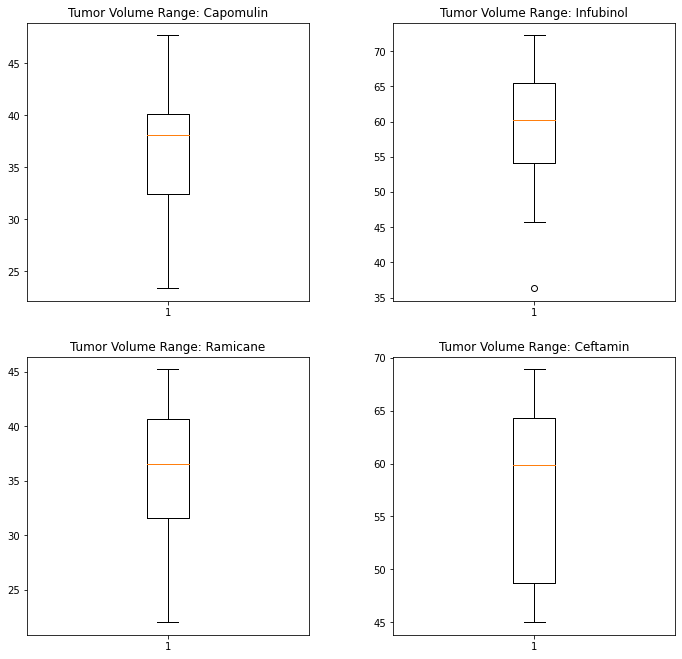

In [148]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# https://matplotlib.org/3.1.1/gallery/statistics/boxplot_demo.html
fig, ax = plt.subplots(2, 2,figsize=(10,10))

ax[0,0].boxplot(regimen_df['Capomulin'])
ax[0,0].set_title('Tumor Volume Range: Capomulin')

ax[1,0].boxplot(regimen_df['Ramicane'])
ax[1,0].set_title('Tumor Volume Range: Ramicane')

ax[0,1].boxplot(regimen_df['Infubinol'])
ax[0,1].set_title('Tumor Volume Range: Infubinol')

ax[1,1].boxplot(regimen_df['Ceftamin'])
ax[1,1].set_title('Tumor Volume Range: Ceftamin')

fig.subplots_adjust(left=0.08, right=0.98, bottom=.05, top=0.9, hspace=0.2, wspace=0.3)


## Line and Scatter Plots

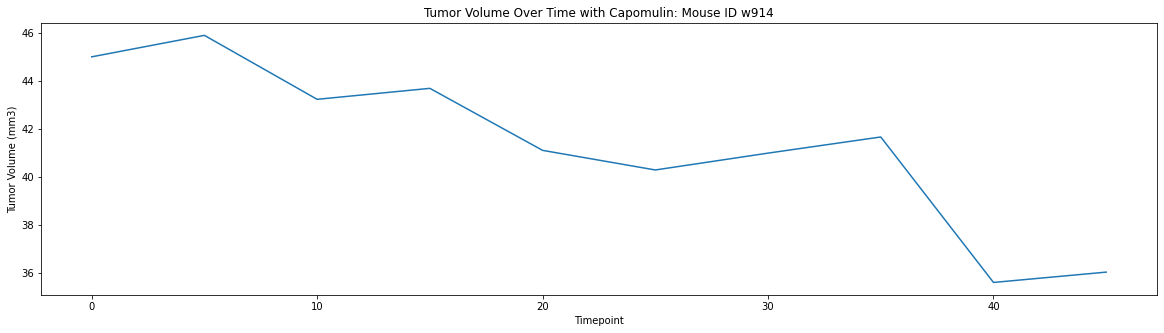

In [149]:
# Generate a line plot of tumor volume vs. timepoint for a mouse treated with Capomulin
mouse = 'w914'

sample_mouse_df = clean_data.loc[data_full['Mouse ID'] == mouse] 
sample_mouse_df = sample_mouse_df.sort_values(by=['Timepoint'])

timepoint = sample_mouse_df['Timepoint']
tumor_volume = sample_mouse_df['Tumor Volume (mm3)']

plt.figure(figsize=(20,5))
plt.plot(timepoint, tumor_volume)
plt.title("Tumor Volume Over Time with Capomulin: Mouse ID w914")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint")
plt.show()

## Correlation and Regression

In [153]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen. 
# Note: this means mouse weight goes on the x-axis, with average tumor volume on the y-axis. 
drug = 'Capomulin'
capomulin_df = clean_data.loc[data_full['Drug Regimen'] == drug] 

weight_df = capomulin_df.groupby(['Mouse ID']).agg({"Weight (g)": "max", "Tumor Volume (mm3)" : "mean"}) 
weight_df = weight_df.sort_values(by=['Weight (g)'])

weight = weight_df['Weight (g)']
avg_vol = weight_df['Tumor Volume (mm3)']

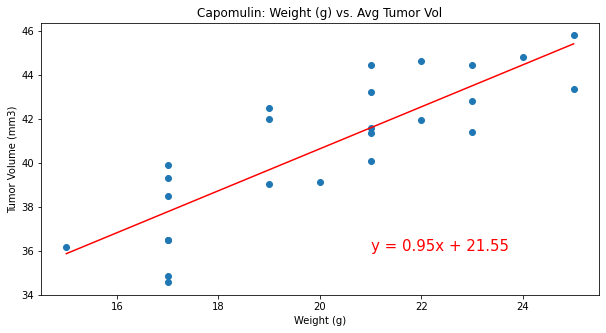

In [154]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen.
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight, avg_vol)
regress_values = weight * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.figure(figsize=(10,5))
plt.scatter(weight, avg_vol)
plt.plot(weight,regress_values, "r-")
plt.annotate(line_eq,(21,36),fontsize=15,color="red")
plt.title(f"{drug}: Weight (g) vs. Avg Tumor Vol")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
plt.show()

# Observations & Insights

In [ ]:
# Observation 1:
    # Based on the box plots, the Capomulin trial appears to have the least
    # variance of all the drug regimen measured. These results indicate that
    # Capomulin may be more consistent at reducing turmor volume relative to
    # the drug regimen reviewed in this analysis.
    
# Observation 2:
    # Looking at the Capomulin trial specifically, the Capomulin Regimen appears 
    # to be an effective treatment to reduce Tumor Volume (mm3) based on the 
    # reduced tumor size over the course of the trial across all mice.
    
# Observation 3:
    # Based on the Average Weight correlation analysis there appears to be 
    # a strong positive correlation between Weight(g) and Tumor Volume (mm3) 
    # in the Capomulin trial.
    # This strong positive correlation could be evidence that weight is a 
    # confounding variable in tumor growth